In [4]:
import pandas as pd


df = pd.read_csv('dataset.csv')
print(df.describe())

           narati       ratio       angel     class_0     class_1     class_2
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000
mean    32.960000    2.899924   56.305000    0.330000    0.350000    0.320000
std     15.308227    0.931572   23.125906    0.472582    0.479372    0.468826
min     12.000000    1.574468   17.000000    0.000000    0.000000    0.000000
25%     22.000000    1.975564   30.000000    0.000000    0.000000    0.000000
50%     27.000000    2.711325   65.000000    0.000000    0.000000    0.000000
75%     49.000000    3.932143   73.000000    1.000000    1.000000    1.000000
max     68.000000    4.447368  109.000000    1.000000    1.000000    1.000000


In [5]:

# Assuming df is your DataFrame
shuffled_df = df.sample(frac=1, random_state=42)  # Shuffle the DataFrame
print(shuffled_df)


    narati     ratio  angel  class_0  class_1  class_2
83      57  1.837209   67.0        0        0        1
53      32  3.702703   35.0        0        1        0
70      52  2.052632   59.0        0        0        1
45      28  3.627907   28.0        0        1        0
44      28  3.714286   26.0        0        1        0
..     ...       ...    ...      ...      ...      ...
60      30  4.121212   27.0        0        1        0
71      45  1.972973   63.0        0        0        1
14      22  3.307692   75.0        1        0        0
92      62  1.844444   65.0        0        0        1
51      27  3.911111   21.0        0        1        0

[100 rows x 6 columns]


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

In [18]:
df['class'] = np.argmax(df[['class_0', 'class_1', 'class_2']].values, axis=1)

# Drop the individual class columns to create the feature set
X = df.drop(['class_0', 'class_1', 'class_2', 'class'], axis=1).values

# Extract the target variable
y = df['class'].values
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [8]:
from sklearn.model_selection import train_test_split
y = to_categorical(y)
print(y.shape)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(100, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Function to get user inputs
def get_user_inputs():
    user_input = []
    for feature in df.columns[:-1]:  # Exclude the last column which is the class
        value = input(f"Enter value for {feature}: ")
        user_input.append(float(value))  # Assuming input values are numeric
    return user_input

In [10]:
model = Sequential([
    Dense(52, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(44, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=25, batch_size=34, validation_split=0.2)

Epoch 1/25
2/2 [==============================] - 1s 168ms/step - loss: 5.6511 - accuracy: 0.2812 - val_loss: 3.5746 - val_accuracy: 0.4375
Epoch 2/25
2/2 [==============================] - 0s 38ms/step - loss: 3.4146 - accuracy: 0.2812 - val_loss: 1.8778 - val_accuracy: 0.4375
Epoch 3/25
2/2 [==============================] - 0s 32ms/step - loss: 1.7322 - accuracy: 0.2812 - val_loss: 1.5662 - val_accuracy: 0.1875
Epoch 4/25
2/2 [==============================] - 0s 16ms/step - loss: 1.3269 - accuracy: 0.3281 - val_loss: 1.4595 - val_accuracy: 0.1875
Epoch 5/25
2/2 [==============================] - 0s 34ms/step - loss: 1.0127 - accuracy: 0.5312 - val_loss: 0.7899 - val_accuracy: 0.5625
Epoch 6/25
2/2 [==============================] - 0s 68ms/step - loss: 0.6269 - accuracy: 0.7188 - val_loss: 0.4017 - val_accuracy: 0.8125
Epoch 7/25
2/2 [==============================] - 0s 43ms/step - loss: 0.5416 - accuracy: 0.7031 - val_loss: 0.2961 - val_accuracy: 0.8125
Epoch 8/25
2/2 [==========

In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)


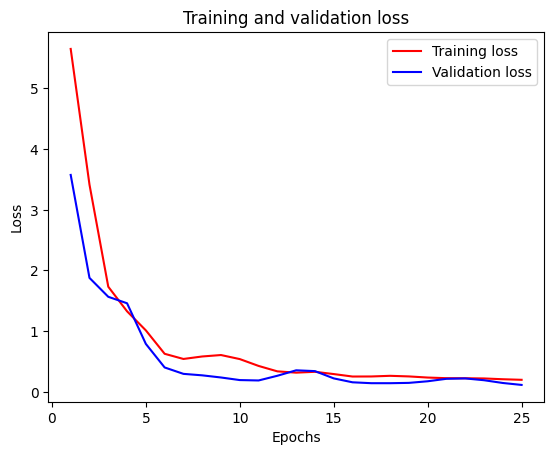

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


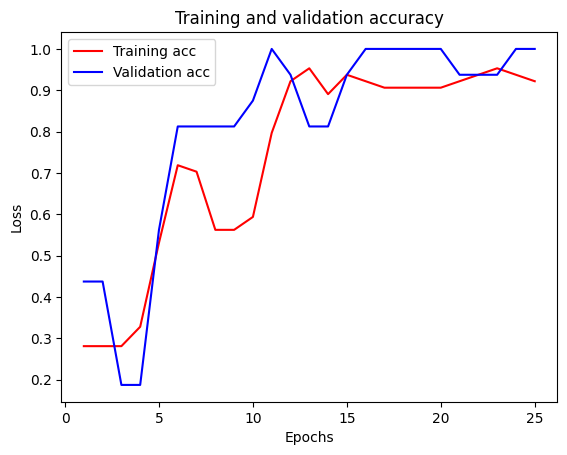

In [15]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

1/1 [==============================] - 0s 25ms/step - loss: 0.1869 - accuracy: 1.0000
Accuracy: 1.0


In [17]:
import numpy as np
from PIL import Image

def predict_class(user_input):
    # Preprocess the user input
    user_input_scaled = scaler.transform(np.array(user_input).reshape(1, -1))
    
    # Make prediction
    predicted_probabilities = model.predict(user_input_scaled)
    predicted_class = np.argmax(predicted_probabilities)

    
    
    return predicted_class

def get_user_inputs():
    user_input = []
    # Assuming your input features are in the same order as in your DataFrame
    # Modify this loop according to your input features
    for feature in df.columns[:-1]:  # Exclude the last column which is the class
        value = input(f"Enter value for {feature}: ")
        user_input.append(value)
    return user_input

# Get user inputs
user_input = get_user_inputs()
predicted_class = predict_class(user_input)
print("Predicted class:", predicted_class)

if(predicted_class == 0):
    print("Predicted class: Allamanda Cathartica")

    image = Image.open('Golden Trumpet.jpeg')
    image.show()

elif(predicted_class == 1):
    print("Predicted class: Ixora coccinea")
    
    image = Image.open('Ixora.jpeg')
    image.show()

elif(predicted_class == 2):
    print("Predicted class:Cryptostegia grandiflora ")
    
    image = Image.open('Cryptostegia grandiflora.jpeg')
    image.show()
else:
    print("Not define")






ValueError: X has 6 features, but StandardScaler is expecting 3 features as input.

In [ ]:
import pandas as pd


df = pd.read_csv('dataset.csv')
print(df.describe())

           narati       ratio       angel     class_0     class_1     class_2
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000
mean    32.960000    2.899924   56.305000    0.330000    0.350000    0.320000
std     15.308227    0.931572   23.125906    0.472582    0.479372    0.468826
min     12.000000    1.574468   17.000000    0.000000    0.000000    0.000000
25%     22.000000    1.975564   30.000000    0.000000    0.000000    0.000000
50%     27.000000    2.711325   65.000000    0.000000    0.000000    0.000000
75%     49.000000    3.932143   73.000000    1.000000    1.000000    1.000000
max     68.000000    4.447368  109.000000    1.000000    1.000000    1.000000


In [ ]:

# Assuming df is your DataFrame
shuffled_df = df.sample(frac=1, random_state=42)  # Shuffle the DataFrame
print(shuffled_df)


    narati     ratio  angel  class_0  class_1  class_2
83      57  1.837209   67.0        0        0        1
53      32  3.702703   35.0        0        1        0
70      52  2.052632   59.0        0        0        1
45      28  3.627907   28.0        0        1        0
44      28  3.714286   26.0        0        1        0
..     ...       ...    ...      ...      ...      ...
60      30  4.121212   27.0        0        1        0
71      45  1.972973   63.0        0        0        1
14      22  3.307692   75.0        1        0        0
92      62  1.844444   65.0        0        0        1
51      27  3.911111   21.0        0        1        0

[100 rows x 6 columns]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

In [ ]:
df['class'] = np.argmax(df[['class_0', 'class_1', 'class_2']].values, axis=1)

# Drop the individual class columns to create the feature set
X = df.drop(['class_0', 'class_1', 'class_2', 'class'], axis=1).values

# Extract the target variable
y = df['class'].values
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
from sklearn.model_selection import train_test_split
y = to_categorical(y)
print(y.shape)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(100, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Function to get user inputs
def get_user_inputs():
    user_input = []
    for feature in df.columns[:-1]:  # Exclude the last column which is the class
        value = input(f"Enter value for {feature}: ")
        user_input.append(float(value))  # Assuming input values are numeric
    return user_input

In [ ]:
model = Sequential([
    Dense(52, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(44, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=25, batch_size=34, validation_split=0.2)

Epoch 1/25
2/2 [==============================] - 1s 168ms/step - loss: 5.6511 - accuracy: 0.2812 - val_loss: 3.5746 - val_accuracy: 0.4375
Epoch 2/25
2/2 [==============================] - 0s 38ms/step - loss: 3.4146 - accuracy: 0.2812 - val_loss: 1.8778 - val_accuracy: 0.4375
Epoch 3/25
2/2 [==============================] - 0s 32ms/step - loss: 1.7322 - accuracy: 0.2812 - val_loss: 1.5662 - val_accuracy: 0.1875
Epoch 4/25
2/2 [==============================] - 0s 16ms/step - loss: 1.3269 - accuracy: 0.3281 - val_loss: 1.4595 - val_accuracy: 0.1875
Epoch 5/25
2/2 [==============================] - 0s 34ms/step - loss: 1.0127 - accuracy: 0.5312 - val_loss: 0.7899 - val_accuracy: 0.5625
Epoch 6/25
2/2 [==============================] - 0s 68ms/step - loss: 0.6269 - accuracy: 0.7188 - val_loss: 0.4017 - val_accuracy: 0.8125
Epoch 7/25
2/2 [==============================] - 0s 43ms/step - loss: 0.5416 - accuracy: 0.7031 - val_loss: 0.2961 - val_accuracy: 0.8125
Epoch 8/25
2/2 [==========

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)


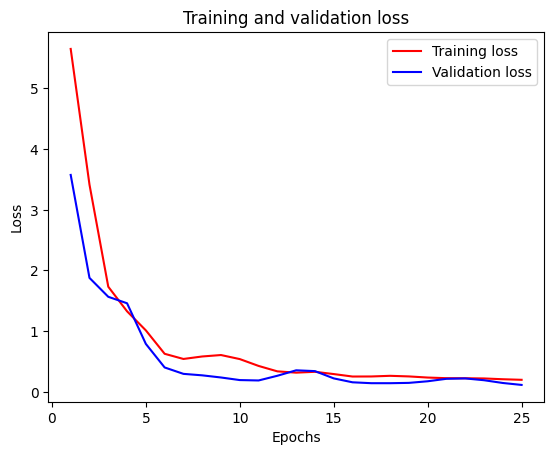

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


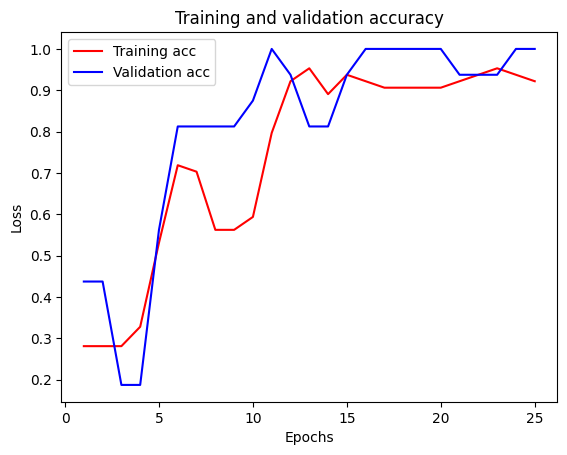

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

1/1 [==============================] - 0s 25ms/step - loss: 0.1869 - accuracy: 1.0000
Accuracy: 1.0


In [ ]:
import numpy as np
from PIL import Image

def predict_class(user_input):
    # Preprocess the user input
    user_input_scaled = scaler.transform(np.array(user_input).reshape(1, -1))
    
    # Make prediction
    predicted_probabilities = model.predict(user_input_scaled)
    predicted_class = np.argmax(predicted_probabilities)

    
    
    return predicted_class

def get_user_inputs():
    user_input = []
    # Assuming your input features are in the same order as in your DataFrame
    # Modify this loop according to your input features
    for feature in df.columns[:-1]:  # Exclude the last column which is the class
        value = input(f"Enter value for {feature}: ")
        user_input.append(value)
    return user_input

# Get user inputs
user_input = get_user_inputs()
predicted_class = predict_class(user_input)
print("Predicted class:", predicted_class)

if(predicted_class == 0):
    print("Predicted class: Allamanda Cathartica")

    image = Image.open('Golden Trumpet.jpeg')
    image.show()

elif(predicted_class == 1):
    print("Predicted class: Ixora coccinea")
    
    image = Image.open('Ixora.jpeg')
    image.show()

elif(predicted_class == 2):
    print("Predicted class:Cryptostegia grandiflora ")
    
    image = Image.open('Cryptostegia grandiflora.jpeg')
    image.show()
else:
    print("Not define")






ValueError: X has 6 features, but StandardScaler is expecting 3 features as input.